In [57]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('heart disease classification dataset.csv')
df = pd.DataFrame(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [59]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [60]:
df = df.dropna()

In [61]:
df = pd.get_dummies(df,columns=['sex' ,'target' ],drop_first=True)

In [62]:
X = df.drop("target_yes",axis=1)
y = df["target_yes"]

In [63]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [49]:
y_pred_train_dt = dt_classifier.predict(X_train)
y_pred_test_dt = dt_classifier.predict(X_test)

In [50]:
accuracy_score(y_train, y_pred_train_dt)

0.8376068376068376

In [51]:
accuracy_score(y_test, y_pred_test_dt)

0.7288135593220338

In [52]:
confusion_matrix(y_train, y_pred_train_dt)

array([[ 82,  26],
       [ 12, 114]], dtype=int64)

In [53]:
confusion_matrix(y_test, y_pred_test_dt)

array([[12, 13],
       [ 3, 31]], dtype=int64)

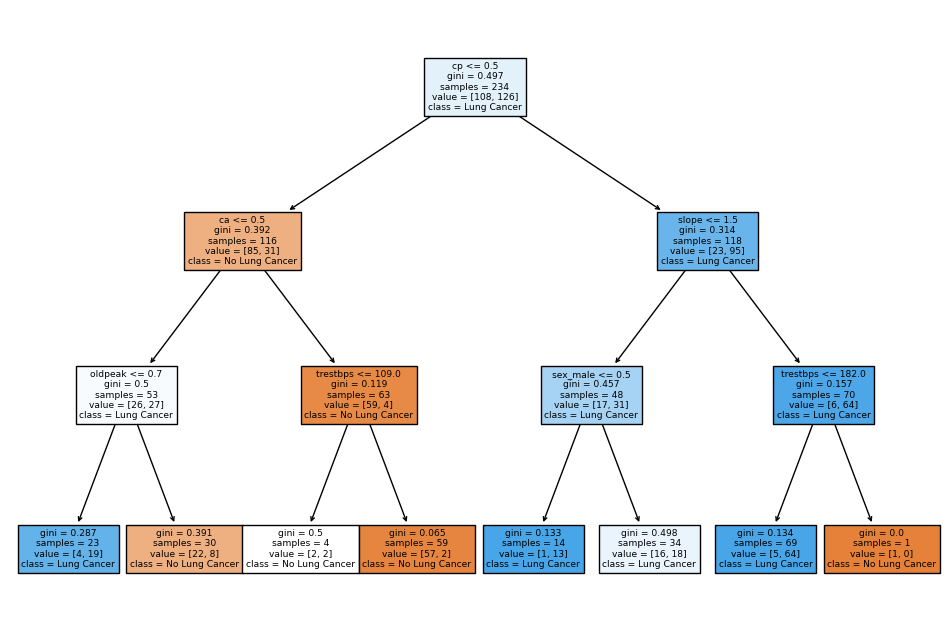

In [54]:
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_classifier, feature_names=X_train.columns, class_names=['No Lung Cancer', 'Lung Cancer'], filled=True)
plt.show()


In [55]:
from sklearn.ensemble import BaggingClassifier

bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000, random_state=42)
bagging_classifier.fit(X_train, y_train)

a:\Project\ML_project_01\venv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  random_state=42)

In [56]:
y_pred_train_bagging = bagging_classifier.predict(X_train)
y_pred_test_bagging = bagging_classifier.predict(X_test)

In [38]:
accuracy_score(y_train, y_pred_train_bagging)

1.0

In [39]:
accuracy_score(y_test, y_pred_test_bagging)

0.7627118644067796

In [64]:
confusion_matrix(y_train, y_pred_train_bagging)

array([[108,   0],
       [  0, 126]], dtype=int64)

In [65]:
confusion_matrix(y_test, y_pred_test_bagging)

array([[12, 13],
       [ 1, 33]], dtype=int64)